In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

| العمود               | الوصف                        |
|----------------------|------------------------------|
| Date                 | التاريخ                      |
| Store ID             | كود المتجر                   |
| Product ID           | كود المنتج                   |
| Category             | فئة المنتج                   |
| Region               | المنطقة                      |
| Inventory Level      | المخزون الحالي               |
| Units Sold           | عدد الوحدات المباعة          |
| Units Ordered        | عدد الوحدات المطلوبة         |
| Demand Forecast      | التوقعات للطلب              |
| Price                | السعر                        |
| Discount             | الخصم                        |
| Weather Condition    | حالة الطقس                  |
| Holiday/Promotion    | هل في عرض أو عطلة            |
| Competitor Pricing   | سعر المنافس                  |
| Seasonality          | الموسم                       |


In [2]:
df = pd.read_csv("retail_store_inventory.csv")
df

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73095,2024-01-01,S005,P0016,Furniture,East,96,8,127,18.46,73.73,20,Snowy,0,72.45,Winter
73096,2024-01-01,S005,P0017,Toys,North,313,51,101,48.43,82.57,10,Cloudy,0,83.78,Autumn
73097,2024-01-01,S005,P0018,Clothing,West,278,36,151,39.65,11.11,10,Rainy,0,10.91,Winter
73098,2024-01-01,S005,P0019,Toys,East,374,264,21,270.52,53.14,20,Rainy,0,55.80,Spring


In [3]:
df['Sales']=(df['Price']*df['Units Sold'])-df['Discount']

In [4]:
df['Sales_Lag_1'] = df['Sales'].shift(1)

In [5]:
df.fillna(0, inplace=True)

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,Sales,Sales_Lag_1
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn,4234.50,0.00
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn,9431.50,4234.50
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer,1809.35,9431.50
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn,1985.92,1809.35
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer,1030.96,1985.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73095,2024-01-01,S005,P0016,Furniture,East,96,8,127,18.46,73.73,20,Snowy,0,72.45,Winter,569.84,26892.98
73096,2024-01-01,S005,P0017,Toys,North,313,51,101,48.43,82.57,10,Cloudy,0,83.78,Autumn,4201.07,569.84
73097,2024-01-01,S005,P0018,Clothing,West,278,36,151,39.65,11.11,10,Rainy,0,10.91,Winter,389.96,4201.07
73098,2024-01-01,S005,P0019,Toys,East,374,264,21,270.52,53.14,20,Rainy,0,55.80,Spring,14008.96,389.96


In [9]:
df.isnull().sum()

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
Sales                 0
Sales_Lag_1           0
dtype: int64

In [10]:
print(df["Units Sold"].describe())
print("-"*60)
print(df["Units Ordered"].describe())
print("-"*60)
print(df["Inventory Level"].describe())


count    73100.000000
mean       136.464870
std        108.919406
min          0.000000
25%         49.000000
50%        107.000000
75%        203.000000
max        499.000000
Name: Units Sold, dtype: float64
------------------------------------------------------------
count    73100.000000
mean       110.004473
std         52.277448
min         20.000000
25%         65.000000
50%        110.000000
75%        155.000000
max        200.000000
Name: Units Ordered, dtype: float64
------------------------------------------------------------
count    73100.000000
mean       274.469877
std        129.949514
min         50.000000
25%        162.000000
50%        273.000000
75%        387.000000
max        500.000000
Name: Inventory Level, dtype: float64


In [11]:
df.loc[df["Units Ordered"]+df["Inventory Level"]<df["Units Sold"]]

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,Sales,Sales_Lag_1


<Axes: ylabel='Units Sold'>

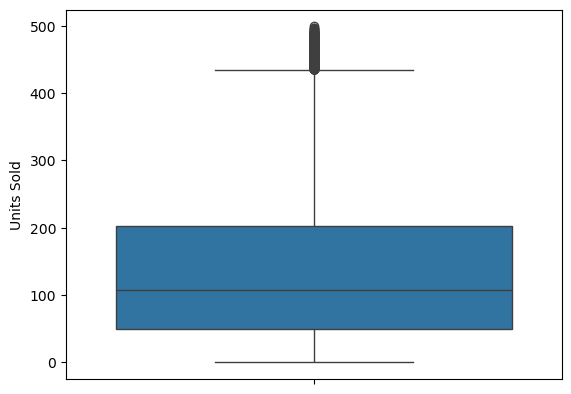

In [12]:
sns.boxplot(df["Units Sold"])

In [13]:
#Q1 = df['Units Sold'].quantile(0.25)
#Q3 = df['Units Sold'].quantile(0.75)
#IQR = Q3 - Q1
#df = df[(df['Units Sold'] >= Q1 - 1.5 * IQR) & (df['Units Sold'] <= Q3 + 1.5 * IQR)]


In [14]:
#sns.boxplot(df["Units Sold"])

In [15]:
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['dayofweek'] = df['Date'].dt.dayofweek

In [16]:
a=df.loc[df["Demand Forecast"]<=0]
a["Units Sold"].describe()

count    673.000000
mean       2.912333
std        2.533651
min        0.000000
25%        1.000000
50%        2.000000
75%        5.000000
max        9.000000
Name: Units Sold, dtype: float64

In [17]:
print(df["Demand Forecast"].describe())

count    73100.000000
mean       141.494720
std        109.254076
min         -9.990000
25%         53.670000
50%        113.015000
75%        208.052500
max        518.550000
Name: Demand Forecast, dtype: float64


In [18]:
a = df.loc[df["Demand Forecast"] < 0]
print(a[["Units Sold", "Demand Forecast"]].describe())
a[["Units Sold", "Demand Forecast"]].sort_values(by="Demand Forecast", ascending = False).head(20)



       Units Sold  Demand Forecast
count  673.000000       673.000000
mean     2.912333        -3.693730
std      2.533651         2.535978
min      0.000000        -9.990000
25%      1.000000        -5.470000
50%      2.000000        -3.380000
75%      5.000000        -1.540000
max      9.000000        -0.010000


,Units Sold,Demand Forecast
68261,1,-0.01
1398,0,-0.03
16796,1,-0.04
61504,3,-0.05
50040,3,-0.05
61558,8,-0.06
27576,3,-0.08
21707,1,-0.09
46936,0,-0.09
40311,8,-0.10


In [19]:
df=df[df['Demand Forecast']>=0]


In [20]:
df=df[df["Demand Forecast"]>0]
df["Demand Forecast"].describe()

count    72427.000000
mean       142.843828
std        108.855924
min          0.010000
25%         55.005000
50%        114.450000
75%        209.200000
max        518.550000
Name: Demand Forecast, dtype: float64

In [21]:
df[["month","Seasonality"]].head(10)

,month,Seasonality
0,1,Autumn
1,1,Autumn
2,1,Summer
3,1,Autumn
4,1,Summer
5,1,Winter
6,1,Winter
7,1,Spring
8,1,Autumn
9,1,Winter


In [22]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'
df['Seasonality'] = df['month'].apply(get_season)
df[['Date', 'month', 'Seasonality']].head()

,Date,month,Seasonality
0,2022-01-01,1,Winter
1,2022-01-01,1,Winter
2,2022-01-01,1,Winter
3,2022-01-01,1,Winter
4,2022-01-01,1,Winter


In [23]:
df[["month","Seasonality"]].head(10)

,month,Seasonality
0,1,Winter
1,1,Winter
2,1,Winter
3,1,Winter
4,1,Winter
5,1,Winter
6,1,Winter
7,1,Winter
8,1,Winter
9,1,Winter


In [24]:
monthy_sales = df.groupby(pd.Grouper(key='Date', freq='M'))[['Units Sold']].sum().reset_index()

C:\Users\nice\AppData\Local\Temp\ipykernel_10712\1279442989.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthy_sales = df.groupby(pd.Grouper(key='Date', freq='M'))[['Units Sold']].sum().reset_index()


In [25]:
monthy_sales = pd.DataFrame(monthy_sales )
monthy_sales.sort_values(by="Date", ascending=False, inplace=True)
monthy_sales

,Date,Units Sold
24,2024-01-31,13236
23,2023-12-31,418562
22,2023-11-30,416043
21,2023-10-31,425514
20,2023-09-30,405252
19,2023-08-31,416426
18,2023-07-31,437824
17,2023-06-30,405547
16,2023-05-31,418572
15,2023-04-30,400976


In [26]:
monthly_avg = df.groupby('month')[['Sales']].mean().reset_index()
weekday_avg = df.groupby('dayofweek')[['Sales']].mean().reset_index()

    month        Sales
0       1  7526.564094
1       2  7669.124811
2       3  7690.676637
3       4  7568.460330
4       5  7440.933844
5       6  7670.283794
6       7  7698.556848
7       8  7500.745891
8       9  7564.020797
9      10  7585.571379
10     11  7745.712928
11     12  7381.148355


Text(0.5, 1.0, 'Average Monthly Sales')

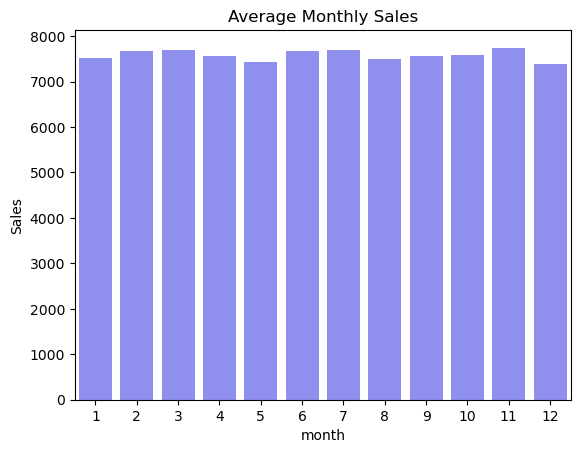

In [27]:
print(monthly_avg)
sns.barplot(x='month', y='Sales', data=monthly_avg,color='blue',alpha=0.5)
plt.title('Average Monthly Sales')

   dayofweek        Sales
0          0  7481.462206
1          1  7539.144624
2          2  7582.613728
3          3  7651.273573
4          4  7648.685313
5          5  7542.871788
6          6  7653.317873


Text(0.5, 1.0, 'Average Weekly Sales')

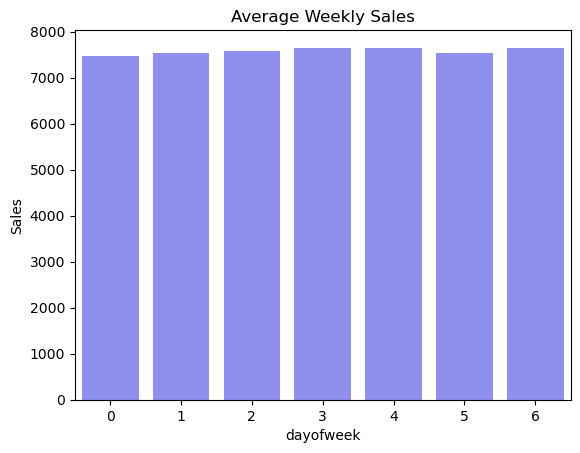

In [28]:
print(weekday_avg)
sns.barplot(x='dayofweek', y='Sales', data=weekday_avg,color='blue',alpha=0.5)
plt.title('Average Weekly Sales')

      Category        Sales
3    Groceries  7659.506863
2    Furniture  7641.917404
0     Clothing  7553.934984
4         Toys  7548.285481
1  Electronics  7523.196308


Text(0.5, 1.0, 'Average Sales by Category')

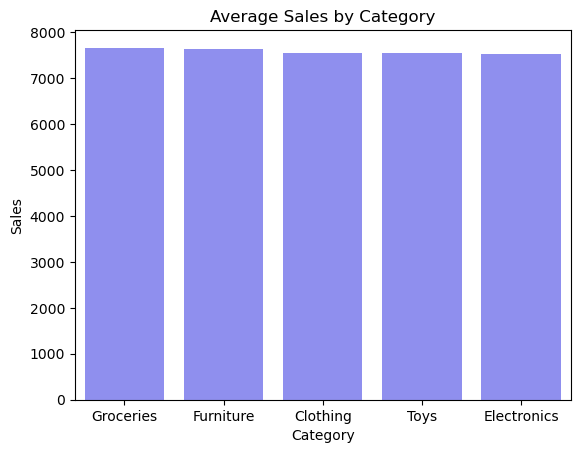

In [29]:
category_sales = df.groupby('Category')["Sales"].mean().reset_index()
category_sales.sort_values(by="Sales", ascending=False, inplace=True)
print(category_sales)
sns.barplot(x='Category', y='Sales', data=category_sales, color='blue', alpha=0.5)
plt.title('Average Sales by Category')

   Holiday/Promotion        Sales
0                  0  7584.275829
1                  1  7586.704307


Text(0.5, 1.0, 'Average Units Sold by Holiday/Promotion')

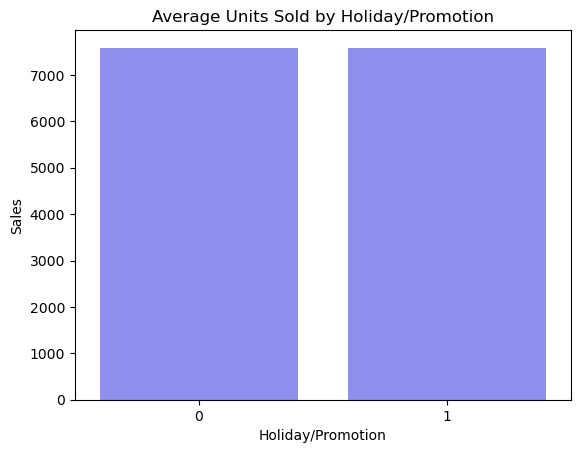

In [30]:
promo_sales = df.groupby("Holiday/Promotion")[['Sales']].mean().reset_index()
print(promo_sales )
sns.barplot(x='Holiday/Promotion', y='Sales', data=promo_sales, color='blue', alpha=0.5)
plt.title("Average Units Sold by Holiday/Promotion")

  Region        Sales
0   East  7627.722735
1  North  7587.384592
2  South  7619.283986
3   West  7507.148002


Text(0.5, 1.0, 'Region vs Units Sold')

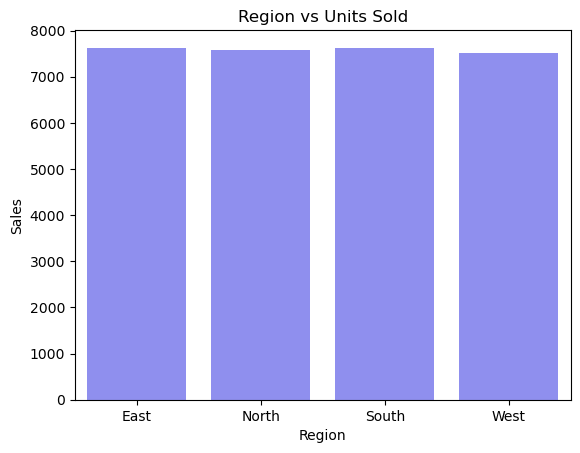

In [31]:
reigon_sales = df.groupby('Region')[['Sales']].mean().reset_index()
print(reigon_sales)
sns.barplot(x='Region', y='Sales', data=reigon_sales, color='blue', alpha=0.5)
plt.title("Region vs Units Sold")

In [32]:
df["Store ID"].groupby(df["Region"]).unique()

Region
East     [S001, S002, S003, S004, S005]
North    [S001, S002, S003, S004, S005]
South    [S001, S002, S003, S004, S005]
West     [S001, S002, S003, S004, S005]
Name: Store ID, dtype: object

   Region Store ID        Sales
0    East     S001  7388.859846
1    East     S002  7690.478731
2    East     S003  7642.266151
3    East     S004  7544.366796
4    East     S005  7870.355146
5   North     S001  7495.762302
6   North     S002  7689.084905
7   North     S003  7543.784076
8   North     S004  7566.033343
9   North     S005  7643.611057
10  South     S001  7404.822386
11  South     S002  7479.149263
12  South     S003  7919.850381
13  South     S004  7420.684320
14  South     S005  7870.046302
15   West     S001  7552.988492
16   West     S002  7489.809639
17   West     S003  7603.588216
18   West     S004  7477.967182
19   West     S005  7412.074315


C:\Users\nice\AppData\Local\Temp\ipykernel_10712\94973003.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  a=sns.barplot(x='Store ID', y='Sales', hue="Region",data=store_sales, color='blue')


Text(0.5, 1.0, 'Store Sales by Region')

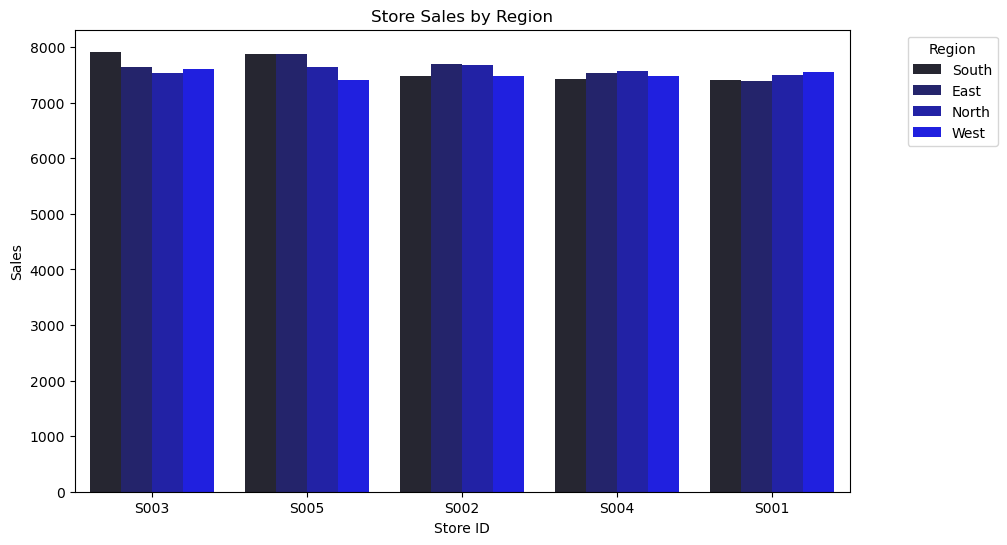

In [33]:
store_sales = df.groupby(['Region', 'Store ID'])['Sales'].mean().reset_index()
print(store_sales)
store_sales.sort_values(by="Sales", ascending=False,inplace=True)
plt.figure(figsize=(10, 6))
a=sns.barplot(x='Store ID', y='Sales', hue="Region",data=store_sales, color='blue')
sns.move_legend(a,"upper right", bbox_to_anchor=(1.2, 1), title="Region")
plt.title("Store Sales by Region")

In [34]:
daily_sales = df.groupby(['Region', 'Date'])['Sales'].mean().reset_index()
daily_sales.head(40)

,Region,Date,Sales
0,East,2022-01-01,9639.718235
1,East,2022-01-02,9578.534138
2,East,2022-01-03,6007.806500
3,East,2022-01-04,6470.334348
4,East,2022-01-05,7721.911071
5,East,2022-01-06,8751.780800
6,East,2022-01-07,7249.425217
7,East,2022-01-08,8436.439545
8,East,2022-01-09,11631.895185
9,East,2022-01-10,8285.883333


In [35]:
df.describe()

,Date,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing,Sales,Sales_Lag_1,month,year,dayofweek
count,72427,72427.00000,72427.000000,72427.000000,72427.000000,72427.000000,72427.000000,72427.000000,72427.000000,72427.000000,72427.000000,72427.000000,72427.000000,72427.00000
mean,2022-12-31 19:03:08.432490496,275.16509,137.705856,110.019385,142.843828,55.130557,10.010217,0.497453,55.144279,7585.483882,7521.033968,6.518923,2022.501443,3.00185
min,2022-01-01 00:00:00,50.00000,0.000000,20.000000,0.010000,10.000000,0.000000,0.000000,5.030000,-20.000000,-20.000000,1.000000,2022.000000,0.00000
25%,2022-07-02 00:00:00,163.00000,50.000000,65.000000,55.005000,32.635000,5.000000,0.000000,32.660000,2082.475000,2012.615000,4.000000,2022.000000,1.00000
50%,2023-01-01 00:00:00,274.00000,109.000000,110.000000,114.450000,55.050000,10.000000,0.000000,55.020000,5017.270000,4946.900000,7.000000,2023.000000,3.00000
75%,2023-07-03 00:00:00,387.00000,204.000000,155.000000,209.200000,77.860000,15.000000,1.000000,77.830000,10685.930000,10614.785000,10.000000,2023.000000,5.00000
max,2024-01-01 00:00:00,500.00000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000,47855.470000,47855.470000,12.000000,2024.000000,6.00000
std,NaN,129.76765,108.656966,52.279517,108.855924,26.025696,7.083303,0.499997,26.197211,7538.739426,7543.558762,3.452089,0.502700,2.00382


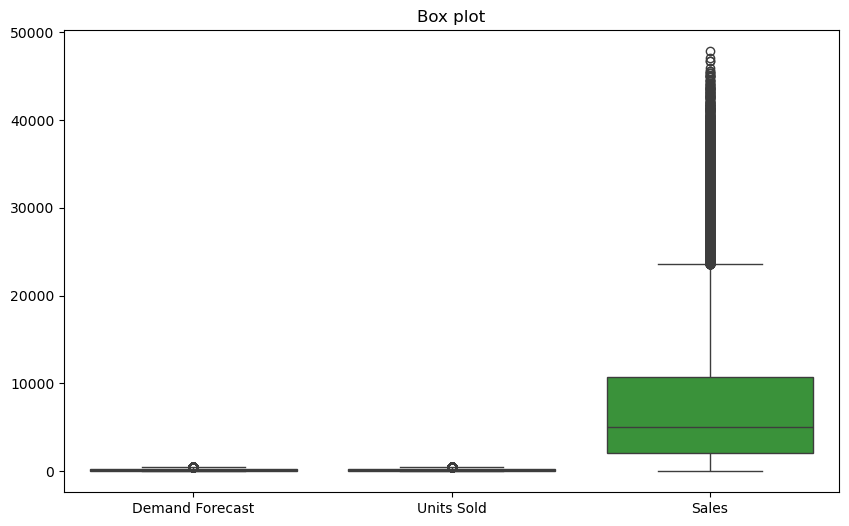

In [36]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['Demand Forecast','Units Sold',"Sales"]])
plt.title('Box plot')
plt.show()

In [37]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#df['Category'] = le.fit_transform(df['Category'])
#df

In [38]:
#df['Store ID'] = le.fit_transform(df['Store ID'])
#df['Region'] = le.fit_transform(df['Region'])
#df['Product ID'] = le.fit_transform(df['Product ID'])
#df['Weather Condition'] = le.fit_transform(df['Weather Condition'])
#df['Seasonality'] = le.fit_transform(df['Seasonality'])


In case normalization is needed

In [39]:
#scaler = MinMaxScaler()
#df_normalized = df.copy()  # Create a copy to preserve original data
#df_normalized[numerical_cols] = scaler.fit_transform(numerical_data)

In [40]:
df.loc[df["year"]==2024,["month"]]

,month
73000,1
73001,1
73002,1
73003,1
73004,1
...,...
73095,1
73096,1
73097,1
73098,1


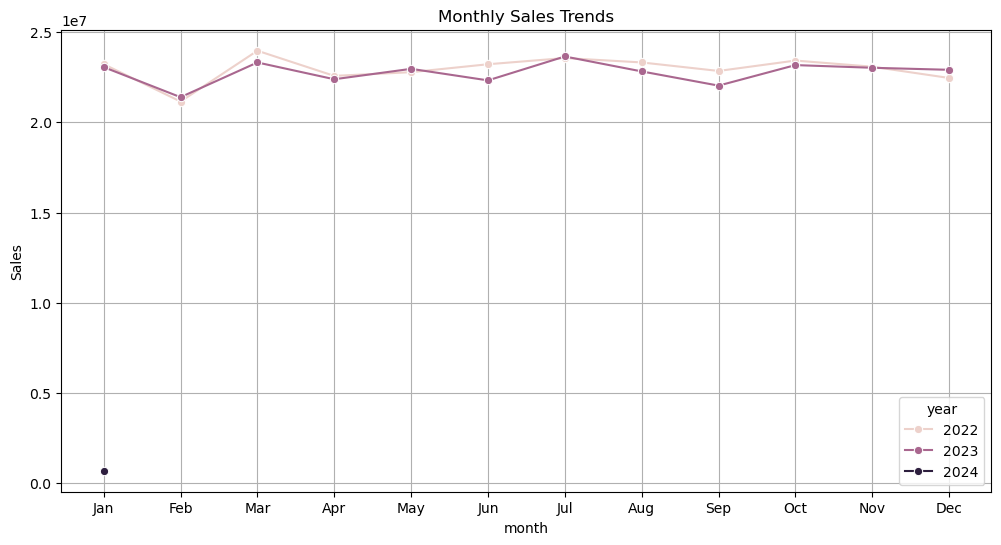

In [41]:
monthly_sales = df.groupby(['year', 'month'])['Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='month', y='Sales', hue='year', marker='o')
plt.title('Monthly Sales Trends')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()


Text(0.5, 1.0, 'Correlation Heatmap')

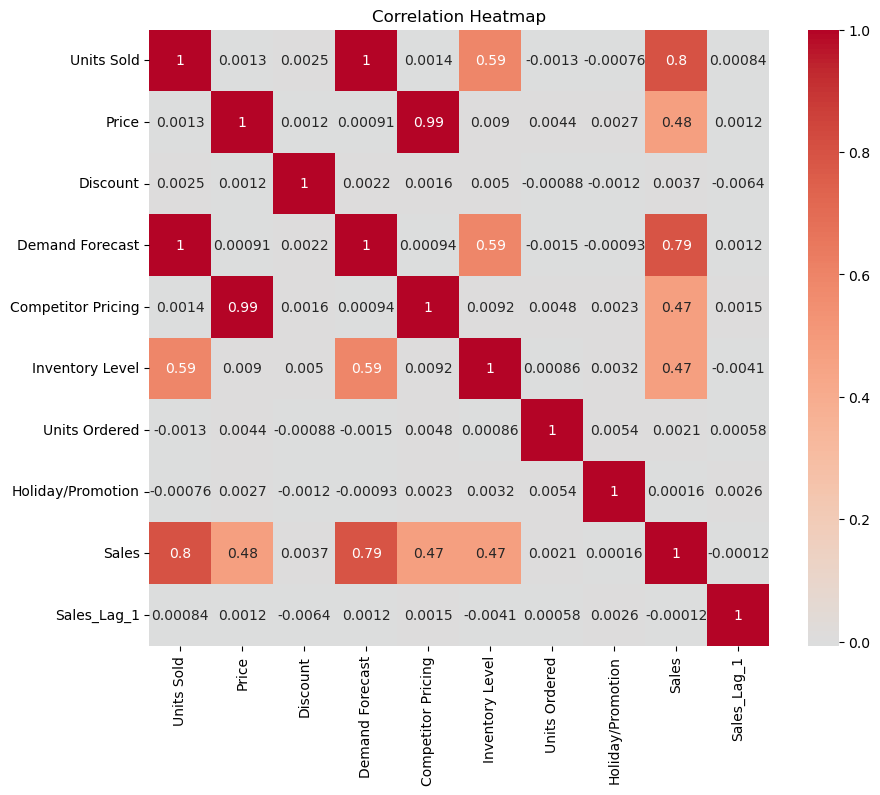

In [42]:
numerical_cols = ['Units Sold', 'Price', 'Discount', 'Demand Forecast', 'Competitor Pricing', "Inventory Level", 'Units Ordered', "Holiday/Promotion", "Sales", "Sales_Lag_1"]
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')


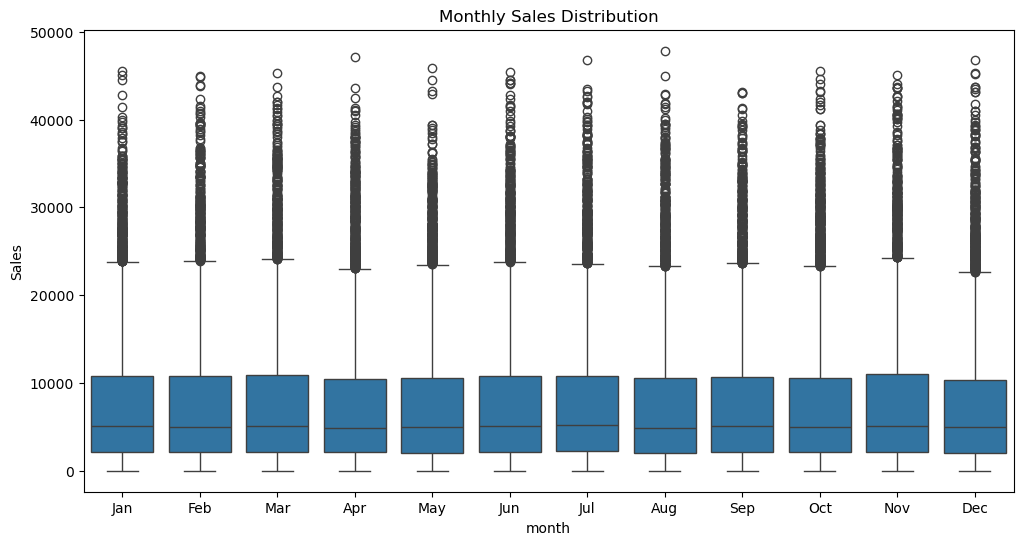

In [43]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='month', y='Sales')
plt.title('Monthly Sales Distribution')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

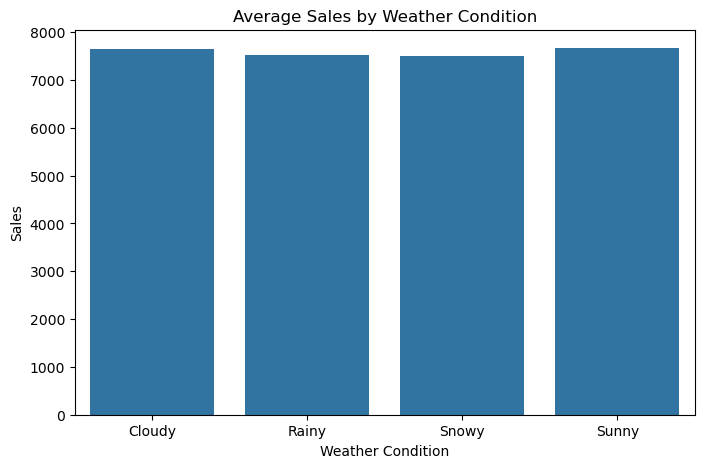

In [44]:
weather_sales = df.groupby('Weather Condition')['Sales'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=weather_sales, x='Weather Condition', y='Sales', )
plt.title('Average Sales by Weather Condition')
plt.show()